In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

In [3]:
Delta = 1.9
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]
+ (1.9) [Z0 Z1]
+ (1.9) [Z1 Z2]
+ (1.9) [Z2 Z3]
+ (1.9) [Z3 Z4]
+ (1.9) [Z4 Z5]
+ (1.9) [Z5 Z6]
+ (1.9) [Z6 Z7]
+ (1.9) [Z7 Z8]
+ (1.9) [Z8 Z9]
+ (1.9) [Z9 Z0]


In [4]:
params = np.array([np.pi for _ in range(4*depth)])

In [5]:
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

In [6]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [7]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 2 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: -0.08388296128114685
Cost at Step 4: -1.8538539212766096
Cost at Step 6: -4.493953584460047
Cost at Step 8: -5.147783999807464
Cost at Step 10: -7.344945313017024
Cost at Step 12: -11.745467096959844
Cost at Step 14: -16.30484748378289
Cost at Step 16: -17.537076712824376
Cost at Step 18: -19.532150364167265
Cost at Step 20: -20.633544554902066
Cost at Step 22: -21.14113610314023
Cost at Step 24: -21.645070539580352
Cost at Step 26: -21.304183193078696
Cost at Step 28: -21.64330416717907
Cost at Step 30: -22.639917896851834
Cost at Step 32: -22.116350317304594
Cost at Step 34: -22.881372820100882
Cost at Step 36: -23.098231463753596
Cost at Step 38: -22.895328317705786
Cost at Step 40: -23.19868038733452
Cost at Step 42: -22.892038102572684
Cost at Step 44: -20.750473442109172
Cost at Step 46: -23.067715685073832
Cost at Step 48: -21.56991677524868
Cost at Step 50: -23.261035148113073
Cost at Step 52: -22.570502632634668
Cost at Step 54: -23.055928342713237
Cost at Step

In [8]:
print(best_cost)

-23.892776370797833


In [9]:
print(cost_fn(best_params))

-23.892776370797833


In [10]:
print(np.array(best_params))

[ 5.73443312  1.36003392  3.3620028   2.96970555  2.79296243  1.77469058
  0.90271696 -1.07029864  3.66237986  1.51613853  3.31674272  0.0242869
  1.50883855  1.5626213   4.45537913  1.90995681  5.31656904  3.31991608
  5.35984856  0.30856933]


In [11]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,Delta,depth, nq)
    
    print(i,np.abs(corr))

1 0.8472089215504861
2 0.5942948032218117
3 0.5847117363763681
4 0.5350834355717856
5 0.5411853156957345
6 0.5350834355717855
7 0.5617748421971724
8 0.5942948032218122
9 0.7238756617674322


In [12]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='hamiltonian',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.5847117363763681
1 -0.5845645234124287
2 -0.5843670539678042
3 -0.5841193876593231
4 -0.5838215938836088
5 -0.5834737517946129
6 -0.5830759502787026
7 -0.5826282879273181
8 -0.5821308730072023
9 -0.5815838234282122
10 -0.5809872667087365
11 -0.5803413399387047
12 -0.5796461897402243
13 -0.5789019722258436
14 -0.5781088529544572
15 -0.5772670068848713
16 -0.5763766183270396
17 -0.5754378808909799
18 -0.5744509974334011
19 -0.5734161800020432
20 -0.5723336497777519
21 -0.5712036370143108
22 -0.570026380976042
23 -0.5688021298731942
24 -0.5675311407951467
25 -0.5662136796414386
26 -0.56485002105065
27 -0.5634404483271558
28 -0.5619852533657735
29 -0.5604847365743266
30 -0.5589392067941493
31 -0.557348981218553
32 -0.5557143853092825
33 -0.5540357527109845
34 -0.5523134251637146
35 -0.5505477524135048
36 -0.5487390921210258
37 -0.5468878097683654
38 -0.544994278563955
39 -0.5430588793456639
40 -0.5410820004820982
41 -0.5390640377721307
42 -0.5370053943426926
43 -0.5349064805448529
44 

334 -0.022858753158011114
335 -0.023517783825043215
336 -0.02417745679109612
337 -0.024837534560897656
338 -0.025497783012139202
339 -0.026157971440460892
340 -0.026817872603011605
341 -0.027477262760577353
342 -0.028135921718271784
343 -0.028793632864783508
344 -0.02945018321017412
345 -0.030105363422224363
346 -0.030758967861322123
347 -0.031410794613890625
348 -0.032060645524353865
349 -0.0327083262256328
350 -0.03335364616817715
351 -0.03399641864752506
352 -0.03463646083039182
353 -0.03527359377928929
354 -0.03590764247567163
355 -0.0365384358416099
356 -0.03716580675999859
357 -0.03778959209329125
358 -0.03840963270076997
359 -0.039025773454349655
360 -0.03963786325292154
361 -0.040245755035236225
362 -0.04084930579133414
363 -0.04144837657252293
364 -0.042042832499911614
365 -0.042632542771501164
366 -0.04321738066784184
367 -0.04379722355626045
368 -0.04437195289366494
369 -0.044941454227933914
370 -0.04550561719789681
371 -0.04606433553191458
372 -0.04661750704506673
373 -0.04

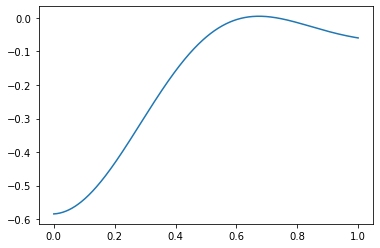

In [14]:
plt.plot(np.linspace(0,1,401),np.real(corr_t))

In [15]:
np.array(corr_t)

tensor([-5.84711736e-01, -5.84564523e-01, -5.84367054e-01,
        -5.84119388e-01, -5.83821594e-01, -5.83473752e-01,
        -5.83075950e-01, -5.82628288e-01, -5.82130873e-01,
        -5.81583823e-01, -5.80987267e-01, -5.80341340e-01,
        -5.79646190e-01, -5.78901972e-01, -5.78108853e-01,
        -5.77267007e-01, -5.76376618e-01, -5.75437881e-01,
        -5.74450997e-01, -5.73416180e-01, -5.72333650e-01,
        -5.71203637e-01, -5.70026381e-01, -5.68802130e-01,
        -5.67531141e-01, -5.66213680e-01, -5.64850021e-01,
        -5.63440448e-01, -5.61985253e-01, -5.60484737e-01,
        -5.58939207e-01, -5.57348981e-01, -5.55714385e-01,
        -5.54035753e-01, -5.52313425e-01, -5.50547752e-01,
        -5.48739092e-01, -5.46887810e-01, -5.44994279e-01,
        -5.43058879e-01, -5.41082000e-01, -5.39064038e-01,
        -5.37005394e-01, -5.34906481e-01, -5.32767714e-01,
        -5.30589519e-01, -5.28372327e-01, -5.26116576e-01,
        -5.23822711e-01, -5.21491183e-01, -5.19122451e-0